In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e20/sample_submission.csv
/kaggle/input/playground-series-s3e20/train.csv
/kaggle/input/playground-series-s3e20/test.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Load DATA

In [3]:
train = pd.read_csv("/kaggle/input/playground-series-s3e20/train.csv")
y = train["emission"]
test = pd.read_csv("/kaggle/input/playground-series-s3e20/test.csv")
df = pd.concat((train.drop(columns = "emission"), test))
class data_preapare:
    def __init__(self):
        self.train = train
        self.test = test
        self.df = df
        self.y = y
        
    def train_test_split(self, df):
        
        return df.iloc[:len(self.train), :], df.iloc[len(self.train):, :].reset_index(drop = True)
    
    def shape(self):
        return self.df.shape

In [4]:
df_data = data_preapare().df
df_data.head()

ID_LAT_LON_YEAR_WEEK  latitude  longitude  year  week_no  \
0  ID_-0.510_29.290_2019_00     -0.51      29.29  2019        0   
1  ID_-0.510_29.290_2019_01     -0.51      29.29  2019        1   
2  ID_-0.510_29.290_2019_02     -0.51      29.29  2019        2   
3  ID_-0.510_29.290_2019_03     -0.51      29.29  2019        3   
4  ID_-0.510_29.290_2019_04     -0.51      29.29  2019        4   

   SulphurDioxide_SO2_column_number_density  \
0                                 -0.000108   
1                                  0.000021   
2                                  0.000514   
3                                       NaN   
4                                 -0.000079   

   SulphurDioxide_SO2_column_number_density_amf  \
0                                      0.603019   
1                                      0.728214   
2                                      0.748199   
3                                           NaN   
4                                      0.676296   

   SulphurDioxide_SO2_slant_column_number_density  \
0                                       -0.000065   
1                                        0.000014   
2                                        0.000385   
3                                             NaN   
4                                       -0.000048   

   SulphurDioxide_cloud_fraction  SulphurDioxide_sensor_azimuth_angle  ...  \
0                       0.255668                           -98.593887  ...   
1                       0.130988                            16.592861  ...   
2                       0.110018                            72.795837  ...   
3                            NaN                                  NaN  ...   
4                       0.121164                             4.121269  ...   

   Cloud_cloud_top_pressure  Cloud_cloud_top_height  \
0              53534.732422             3664.436218   
1              63790.296241             3651.190311   
2              55923.790554             4216.986492   
3              44569.130636             5228.507736   
4              59904.314844             3980.598120   

   Cloud_cloud_base_pressure  Cloud_cloud_base_height  \
0               61085.809570              2615.120483   
1               66969.478735              3174.572424   
2               60068.894448              3516.282669   
3               51064.547339              4180.973322   
4               63751.125781              3355.710107   

   Cloud_cloud_optical_depth  Cloud_surface_albedo  \
0                  15.568533              0.272292   
1                   8.690601              0.256830   
2                  21.103410              0.251101   
3                  15.386899              0.262043   
4                   8.114694              0.235847   

   Cloud_sensor_azimuth_angle  Cloud_sensor_zenith_angle  \
0                  -12.628986                  35.632416   
1                   30.359375                  39.557633   
2                   15.377883                  30.401823   
3                  -11.293399                  24.380357   
4                   38.532263                  37.392979   

   Cloud_solar_azimuth_angle  Cloud_solar_zenith_angle  
0                -138.786423                 30.752140  
1                -145.183930                 27.251779  
2                -142.519545                 26.193296  
3                -132.665828                 28.829155  
4                -141.509805                 22.204612  

[5 rows x 75 columns]

In [5]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103376 entries, 0 to 24352
Data columns (total 75 columns):
 #   Column                                                    Non-Null Count   Dtype  
---  ------                                                    --------------   -----  
 0   ID_LAT_LON_YEAR_WEEK                                      103376 non-null  object 
 1   latitude                                                  103376 non-null  float64
 2   longitude                                                 103376 non-null  float64
 3   year                                                      103376 non-null  int64  
 4   week_no                                                   103376 non-null  int64  
 5   SulphurDioxide_SO2_column_number_density                  82625 non-null   float64
 6   SulphurDioxide_SO2_column_number_density_amf              82625 non-null   float64
 7   SulphurDioxide_SO2_slant_column_number_density            82625 non-null   float64
 8   Sulph

We have 8 type different type of variable, the variable biginning

In [6]:
columns = df_data.columns
variables = set([col.split("_")[0] for col in columns])
variables

{'CarbonMonoxide',
 'Cloud',
 'Formaldehyde',
 'ID',
 'NitrogenDioxide',
 'Ozone',
 'SulphurDioxide',
 'UvAerosolIndex',
 'UvAerosolLayerHeight',
 'latitude',
 'longitude',
 'week',
 'year'}

In [7]:
columns

Index(['ID_LAT_LON_YEAR_WEEK', 'latitude', 'longitude', 'year', 'week_no',
       'SulphurDioxide_SO2_column_number_density',
       'SulphurDioxide_SO2_column_number_density_amf',
       'SulphurDioxide_SO2_slant_column_number_density',
       'SulphurDioxide_cloud_fraction', 'SulphurDioxide_sensor_azimuth_angle',
       'SulphurDioxide_sensor_zenith_angle',
       'SulphurDioxide_solar_azimuth_angle',
       'SulphurDioxide_solar_zenith_angle',
       'SulphurDioxide_SO2_column_number_density_15km',
       'CarbonMonoxide_CO_column_number_density',
       'CarbonMonoxide_H2O_column_number_density',
       'CarbonMonoxide_cloud_height', 'CarbonMonoxide_sensor_altitude',
       'CarbonMonoxide_sensor_azimuth_angle',
       'CarbonMonoxide_sensor_zenith_angle',
       'CarbonMonoxide_solar_azimuth_angle',
       'CarbonMonoxide_solar_zenith_angle',
       'NitrogenDioxide_NO2_column_number_density',
       'NitrogenDioxide_tropospheric_NO2_column_number_density',
       'NitrogenDioxide

<Axes: >

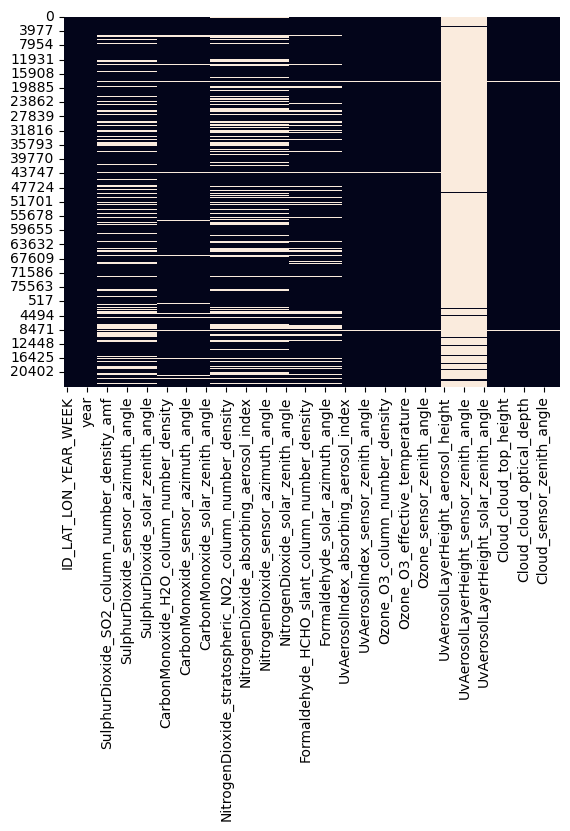

In [8]:
sns.heatmap(df_data.isnull(), cbar = False)

In [9]:
## drop columns who have most 50% nan values
pourcent = df_data.shape[0]//2
columns_to_drop = [col for col in columns if (df_data[col].isnull().sum()>=pourcent)]
columns_to_drop

['UvAerosolLayerHeight_aerosol_height',
 'UvAerosolLayerHeight_aerosol_pressure',
 'UvAerosolLayerHeight_aerosol_optical_depth',
 'UvAerosolLayerHeight_sensor_zenith_angle',
 'UvAerosolLayerHeight_sensor_azimuth_angle',
 'UvAerosolLayerHeight_solar_azimuth_angle',
 'UvAerosolLayerHeight_solar_zenith_angle']

<Axes: >

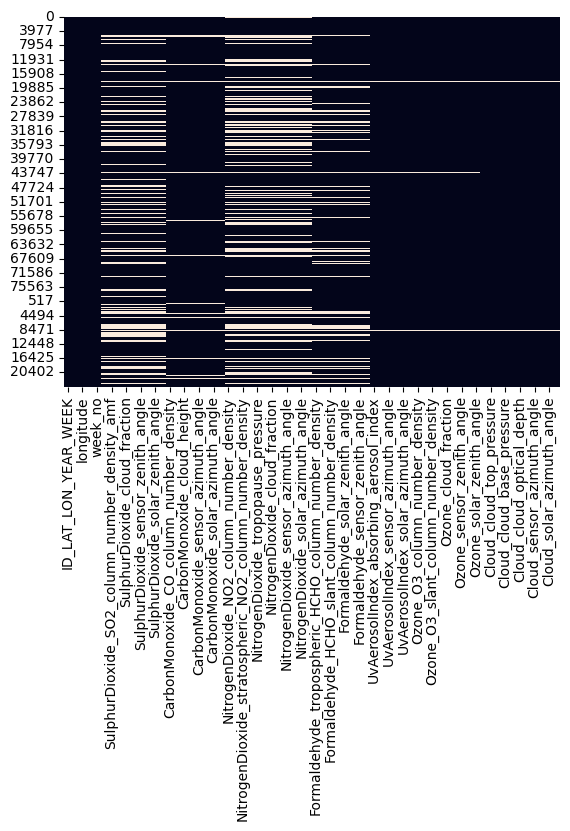

In [10]:
df_data.drop(columns = columns_to_drop, inplace =True)
sns.heatmap(df_data.isnull(), cbar = False)

## DATA ANALYSE AND VISUALISATION


<Axes: xlabel='emission'>

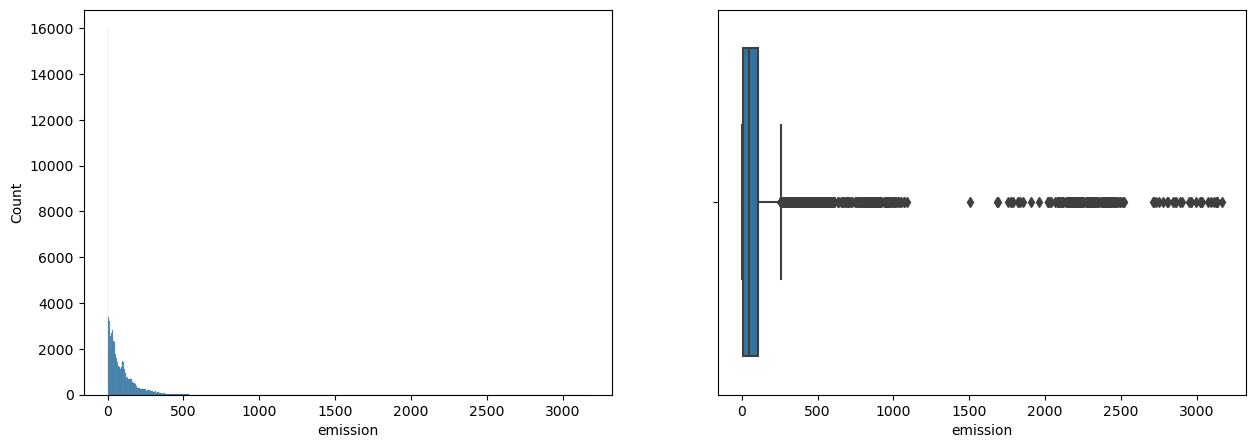

In [11]:
## see the distribution of our emission
figures, axes = plt.subplots(nrows = 1,ncols = 2, figsize = (15,5))

sns.histplot(y, ax = axes[0])
sns.boxplot(data = train, x = "emission", ax = axes[1])

the most values of emissoon are betwen 0 and 500

In [12]:
train["date"] = pd.to_datetime(train['year'].astype(str) + '-' + train['week_no'].astype(str) + '-1', format='%Y-%W-%w')
train["date"]

0       2018-12-31
1       2019-01-07
2       2019-01-14
3       2019-01-21
4       2019-01-28
           ...    
79018   2021-11-29
79019   2021-12-06
79020   2021-12-13
79021   2021-12-20
79022   2021-12-27
Name: date, Length: 79023, dtype: datetime64[ns]

<Axes: xlabel='Date'>

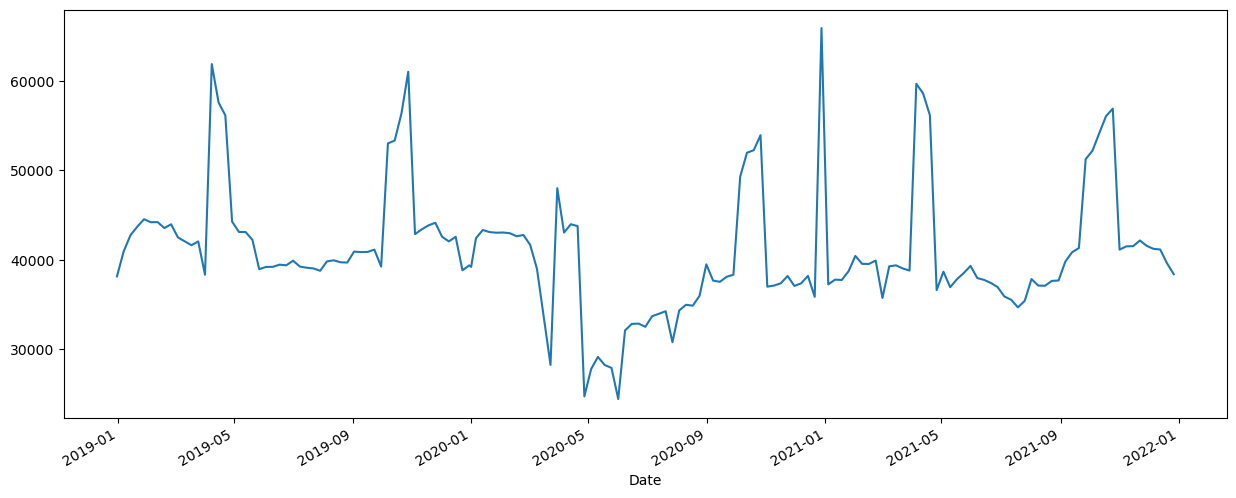

In [13]:

train.groupby(by = "date")["emission"].sum().plot(kind='line', figsize=(15, 6), xlabel='Date')


we notice a significant decrease in emissions in the period of 2020, covid effect

Text(0.5, 1.0, 'Emission by date')

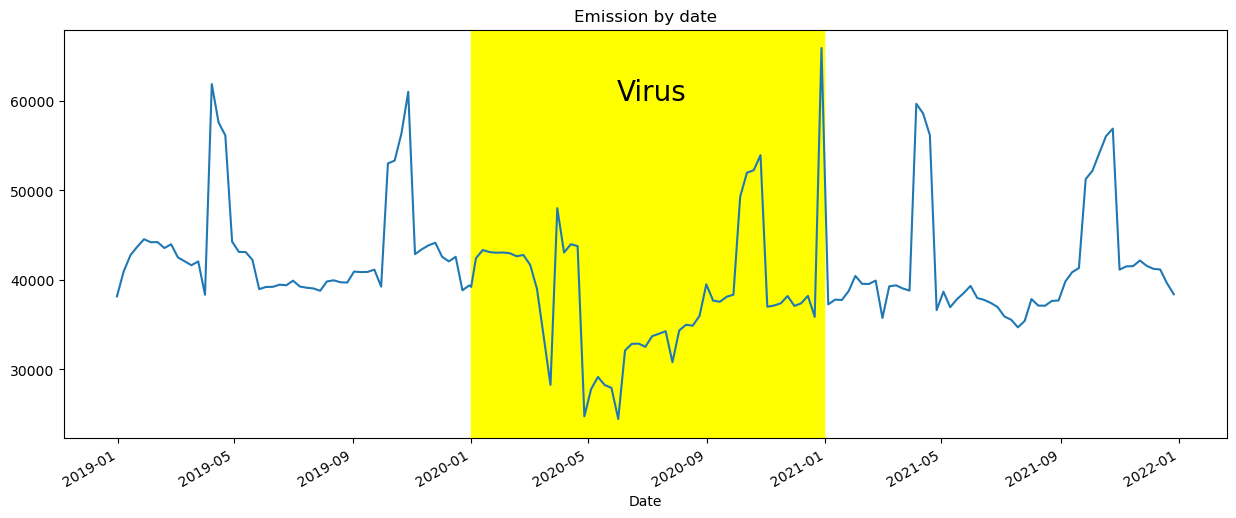

In [14]:
train.groupby(by = "date")["emission"].sum().plot(kind='line', figsize=(15, 6), xlabel='Date')
plt.axvspan(pd.Timestamp("2020-01-01"), pd.Timestamp("2020-12-31"), color = "yellow")
plt.text(pd.Timestamp ('2020-05-30'), 60000, "Virus", size = 20)

plt.title('Emission by date', size=12)

Let see the evolution of emission by week, moth and year

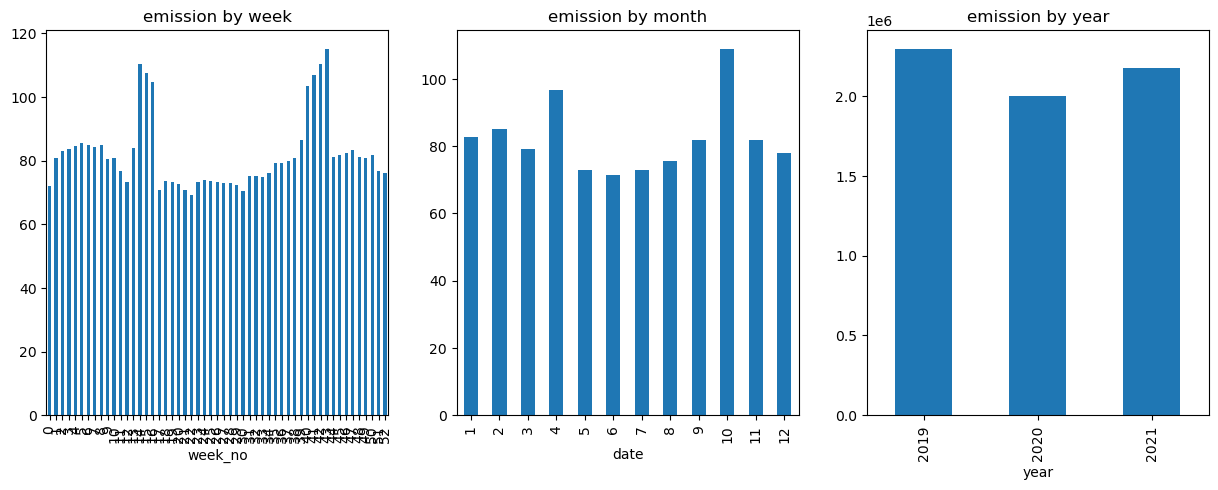

In [15]:
figures, axes = plt.subplots(nrows = 1,ncols = 3, figsize = (15,5))
emission_by_week = train.groupby("week_no")["emission"].mean()
emission_by_moth = train.groupby(train["date"].dt.month)["emission"].mean()
emission_by_year = train.groupby("year")["emission"].sum()
emission_by_week.plot(kind = "bar",title = "emission by week",ax = axes[0])
emission_by_moth.plot(kind = "bar",title = "emission by month", ax = axes[1])
emission_by_year.plot(kind = "bar", title = "emission by year",ax = axes[2])
plt.show()

we notice that, for the April and octomber the emission are very important
Uganda's tropical climate is marked by two seasons: the rainy season from March to May and from September to November and the dry season from December to February and from June to August.

when it's cold, people consume a lot more energy, especially to keep warm

Now let see where people consume most energie

In [16]:
emission_by_log_lat = train.groupby(['latitude', 'longitude'])["emission"].sum().reset_index()
emission_by_log_lat.head()

latitude  longitude     emission
0    -3.299     30.301  4393.694938
1    -3.287     29.713  6690.351773
2    -3.174     29.926  7128.342002
3    -3.161     28.839    20.003610
4    -3.153     30.347  2305.912079

In [17]:
## the place where we don't have emission
emission_by_log_lat[emission_by_log_lat["emission"]==0]

latitude  longitude  emission
38     -2.898     29.002       0.0
43     -2.859     29.041       0.0
52     -2.841     29.159       0.0
62     -2.817     29.283       0.0
118    -2.496     28.504       0.0
224    -1.974     28.526       0.0
264    -1.839     28.761       0.0
266    -1.833     28.467       0.0
283    -1.730     28.470       0.0
286    -1.712     28.688       0.0
288    -1.696     28.304       0.0
294    -1.682     29.218       0.0
318    -1.532     28.568       0.0
329    -1.505     30.995       0.0
367    -1.328     28.872       0.0

In [18]:
import folium
import branca.colormap as cm

colormap = cm.LinearColormap(['green', 'red'], vmin=0, vmax=75000) # emssions above 75k will be labeled black

    # Create a map centered at the mean latitude and longitude of points
m = folium.Map(location=[emission_by_log_lat['latitude'].mean(), emission_by_log_lat['longitude'].mean()])

# Add a circle marker to the map for each point in grouped dataframe
for _, emission in emission_by_log_lat.iterrows():
    rows_emission = emission['emission']
    color = 'blue' if rows_emission == 0 else colormap(rows_emission) if rows_emission < 10**5 else 'black'
    folium.Circle(
        location=[emission['latitude'], emission['longitude']],
        radius=np.sqrt(emission['emission'])*15,
        color=color,
        fill=True,
        fill_color= color
    ).add_to(m)

# Fit the map to the bounds of markers
m.fit_bounds(m.get_bounds())

    # Display the map
m

In [19]:
index = emission_by_log_lat['emission'].sort_values(ascending = False).index
top_10_emission_by_log_lat = emission_by_log_lat.iloc[index].head(10)
top_10_emission_by_log_lat

latitude  longitude      emission
139    -2.378     29.222  355115.62890
203    -2.079     29.321  194279.95637
360    -1.346     31.254   75570.97297
453    -0.956     30.744   72408.28823
363    -1.342     31.358   65127.49235
127    -2.441     28.959   62884.41243
105    -2.599     29.801   56132.05154
260    -1.847     30.953   55175.79754
158    -2.293     29.507   53455.79490
247    -1.889     29.611   51644.60904

In [20]:
    colormap = cm.LinearColormap(['green', 'red'], vmin=0, vmax=75000) # emssions above 75k will be labeled black

    # Create a map centered at the mean latitude and longitude of points
    m = folium.Map(location=[emission_by_log_lat['latitude'].mean(), emission_by_log_lat['longitude'].mean()])

    # Add a circle marker to the map for each point in grouped dataframe
    for _, emission in top_10_emission_by_log_lat.iterrows():
        rows_emission = emission['emission']
        color = 'blue' if rows_emission == 0 else colormap(rows_emission) if rows_emission < 10**5 else 'black'
        folium.Circle(
            location=[emission['latitude'], emission['longitude']],
            radius=np.sqrt(emission['emission'])*15,
            color=color,
            fill=True,
            fill_color= color
        ).add_to(m)

    # Fit the map to the bounds of markers
    m.fit_bounds(m.get_bounds())

    # Display the map
    m

we have 2 loctions (black circle) that notice the higher emission

## Feature engineering

In [21]:
train.head()

ID_LAT_LON_YEAR_WEEK  latitude  longitude  year  week_no  \
0  ID_-0.510_29.290_2019_00     -0.51      29.29  2019        0   
1  ID_-0.510_29.290_2019_01     -0.51      29.29  2019        1   
2  ID_-0.510_29.290_2019_02     -0.51      29.29  2019        2   
3  ID_-0.510_29.290_2019_03     -0.51      29.29  2019        3   
4  ID_-0.510_29.290_2019_04     -0.51      29.29  2019        4   

   SulphurDioxide_SO2_column_number_density  \
0                                 -0.000108   
1                                  0.000021   
2                                  0.000514   
3                                       NaN   
4                                 -0.000079   

   SulphurDioxide_SO2_column_number_density_amf  \
0                                      0.603019   
1                                      0.728214   
2                                      0.748199   
3                                           NaN   
4                                      0.676296   

   SulphurDioxide_SO2_slant_column_number_density  \
0                                       -0.000065   
1                                        0.000014   
2                                        0.000385   
3                                             NaN   
4                                       -0.000048   

   SulphurDioxide_cloud_fraction  SulphurDioxide_sensor_azimuth_angle  ...  \
0                       0.255668                           -98.593887  ...   
1                       0.130988                            16.592861  ...   
2                       0.110018                            72.795837  ...   
3                            NaN                                  NaN  ...   
4                       0.121164                             4.121269  ...   

   Cloud_cloud_base_pressure  Cloud_cloud_base_height  \
0               61085.809570              2615.120483   
1               66969.478735              3174.572424   
2               60068.894448              3516.282669   
3               51064.547339              4180.973322   
4               63751.125781              3355.710107   

   Cloud_cloud_optical_depth  Cloud_surface_albedo  \
0                  15.568533              0.272292   
1                   8.690601              0.256830   
2                  21.103410              0.251101   
3                  15.386899              0.262043   
4                   8.114694              0.235847   

   Cloud_sensor_azimuth_angle  Cloud_sensor_zenith_angle  \
0                  -12.628986                  35.632416   
1                   30.359375                  39.557633   
2                   15.377883                  30.401823   
3                  -11.293399                  24.380357   
4                   38.532263                  37.392979   

   Cloud_solar_azimuth_angle  Cloud_solar_zenith_angle  emission       date  
0                -138.786423                 30.752140  3.750994 2018-12-31  
1                -145.183930                 27.251779  4.025176 2019-01-07  
2                -142.519545                 26.193296  4.231381 2019-01-14  
3                -132.665828                 28.829155  4.305286 2019-01-21  
4                -141.509805                 22.204612  4.347317 2019-01-28  

[5 rows x 77 columns]

In [22]:
columns_with_nan_values = [col for col in df_data.columns if df_data[col].isnull().sum()>0]

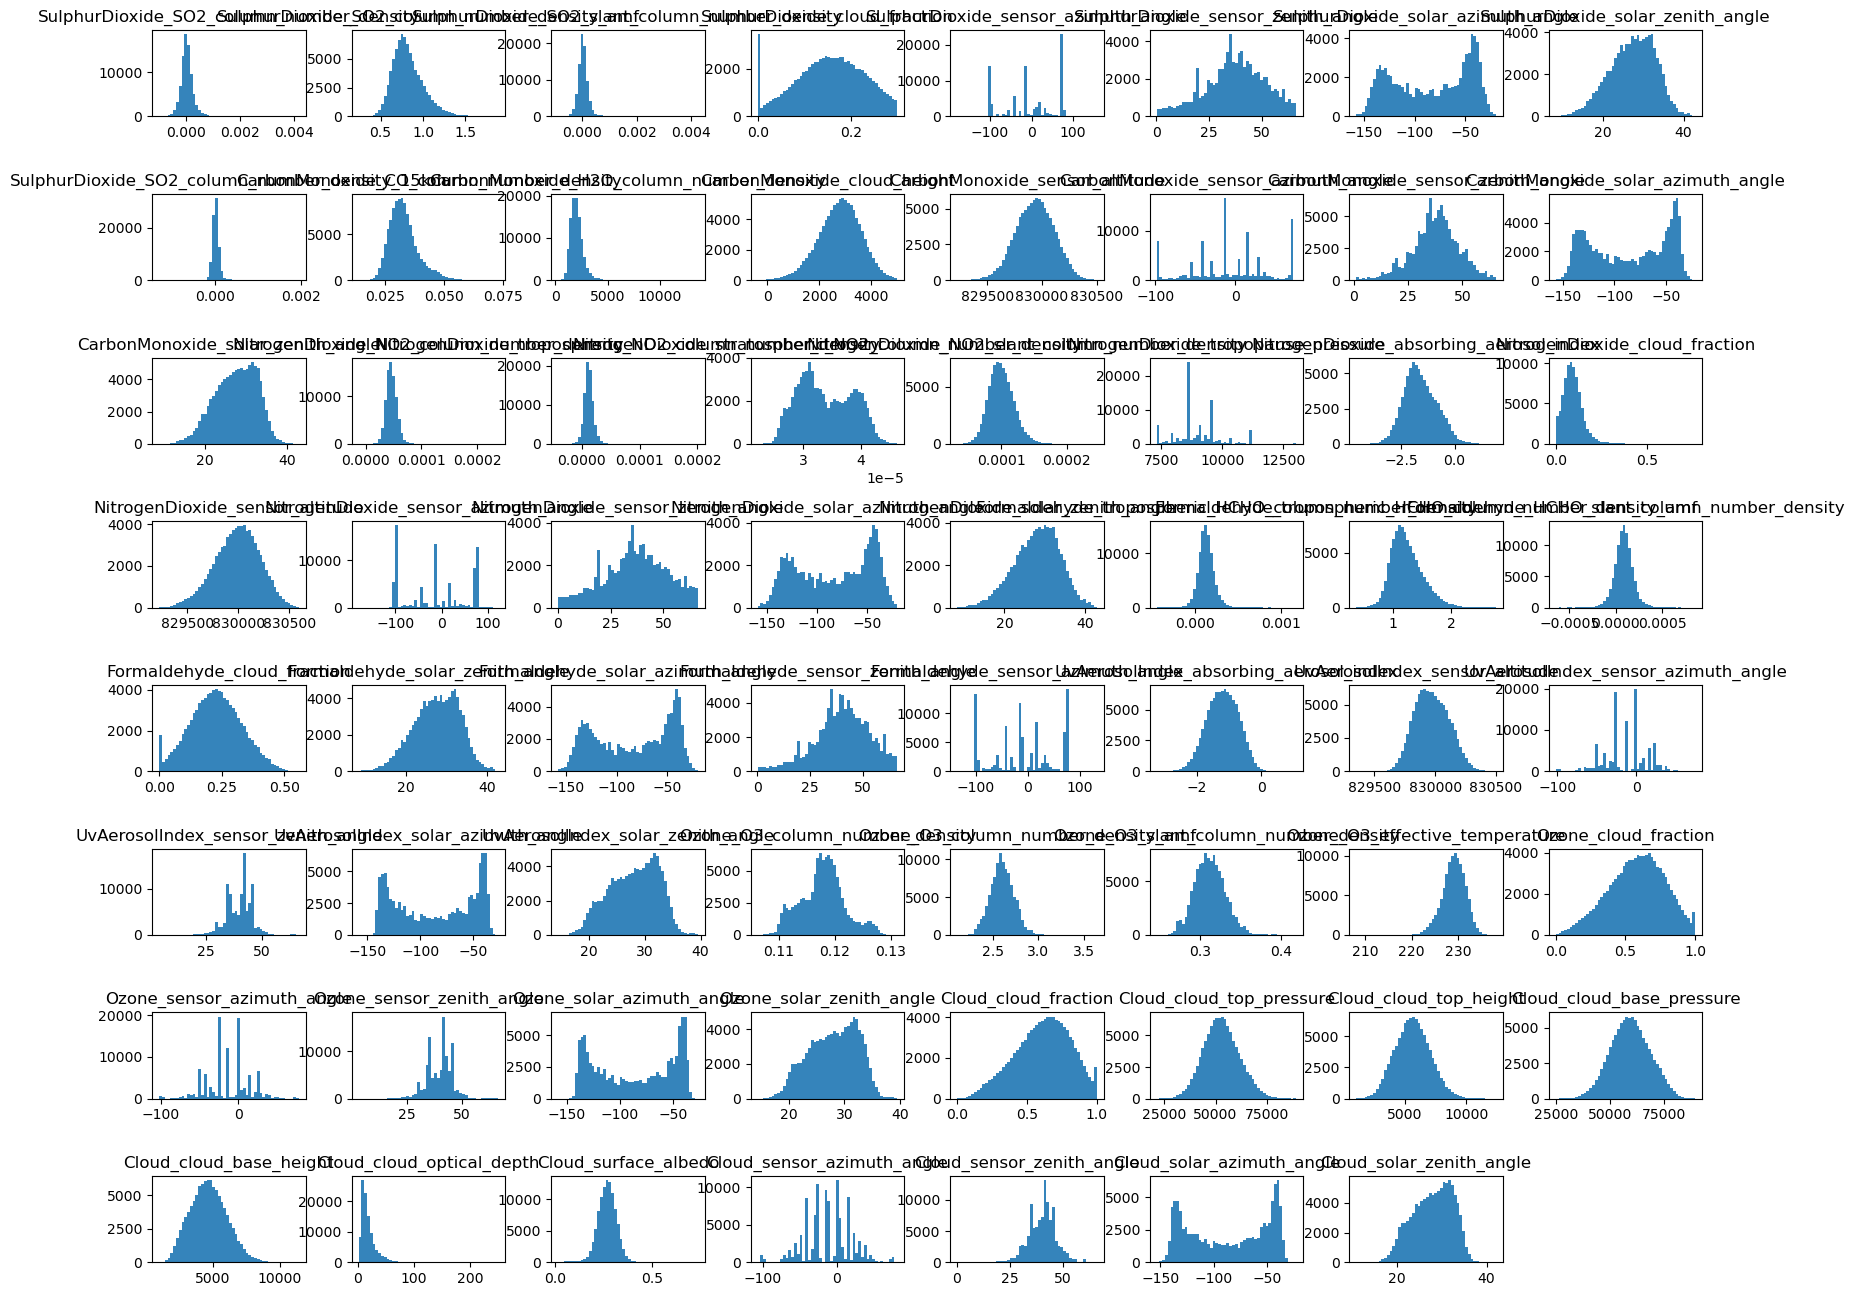

In [23]:
df_data[columns_with_nan_values].hist( bins = 50, figsize=(20,16), grid=False,alpha=0.9)
plt.subplots_adjust(hspace=0.9)
plt.show()

we notice that most of values have the normale distribitubion, so we can replace the nan values by the mean, we can also use RF imputation for the replacement

In [24]:
for col in columns_with_nan_values:
    unique= np.unique(df_data[col])
    print(col + ": " f"{len(unique)}")

SulphurDioxide_SO2_column_number_density: 82621
SulphurDioxide_SO2_column_number_density_amf: 82623
SulphurDioxide_SO2_slant_column_number_density: 82621
SulphurDioxide_cloud_fraction: 79516
SulphurDioxide_sensor_azimuth_angle: 82440
SulphurDioxide_sensor_zenith_angle: 82315
SulphurDioxide_solar_azimuth_angle: 82576
SulphurDioxide_solar_zenith_angle: 82577
SulphurDioxide_SO2_column_number_density_15km: 82623
CarbonMonoxide_CO_column_number_density: 99720
CarbonMonoxide_H2O_column_number_density: 99727
CarbonMonoxide_cloud_height: 99692
CarbonMonoxide_sensor_altitude: 95765
CarbonMonoxide_sensor_azimuth_angle: 99486
CarbonMonoxide_sensor_zenith_angle: 99482
CarbonMonoxide_solar_azimuth_angle: 99580
CarbonMonoxide_solar_zenith_angle: 99605
NitrogenDioxide_NO2_column_number_density: 79391
NitrogenDioxide_tropospheric_NO2_column_number_density: 79374
NitrogenDioxide_stratospheric_NO2_column_number_density: 79385
NitrogenDioxide_NO2_slant_column_number_density: 79379
NitrogenDioxide_tropopa

In [25]:
df_copy = df_data.copy()

In [26]:
for col in columns_with_nan_values:
    df_copy[col].fillna(df_copy[col].mode()[0] , inplace = True)

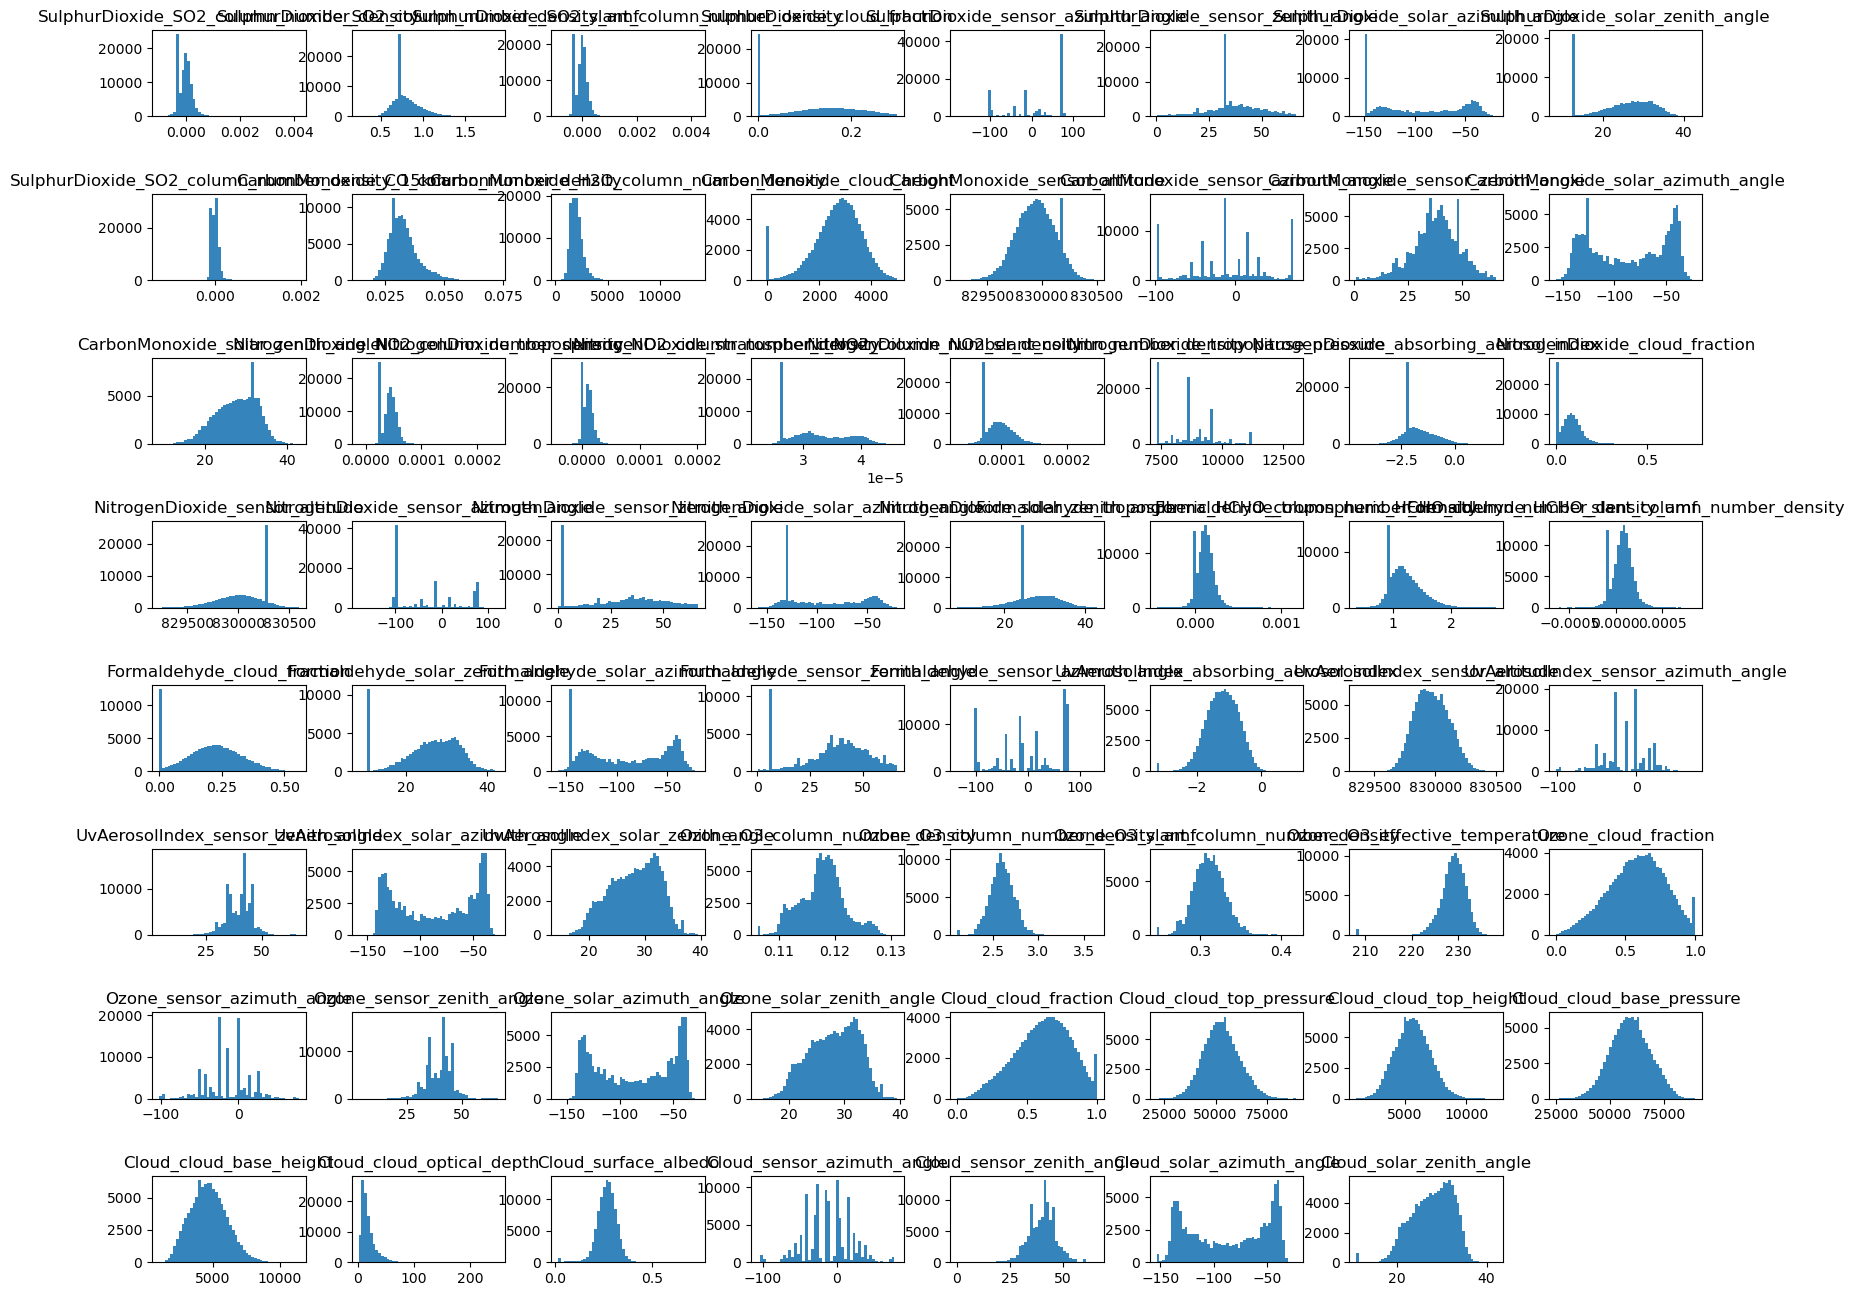

In [27]:
df_copy[columns_with_nan_values].hist( bins = 50, figsize=(20,16), grid=False,alpha=0.9)
plt.subplots_adjust(hspace=0.9)
plt.show()

In [28]:
df_copy2 = df_data.copy()

In [29]:
df_copy2 = df_copy2.fillna(method='ffill').fillna(method='bfill')

In [30]:
df_copy2.isnull().sum()[df_copy2.isnull().sum()>0]

Series([], dtype: int64)

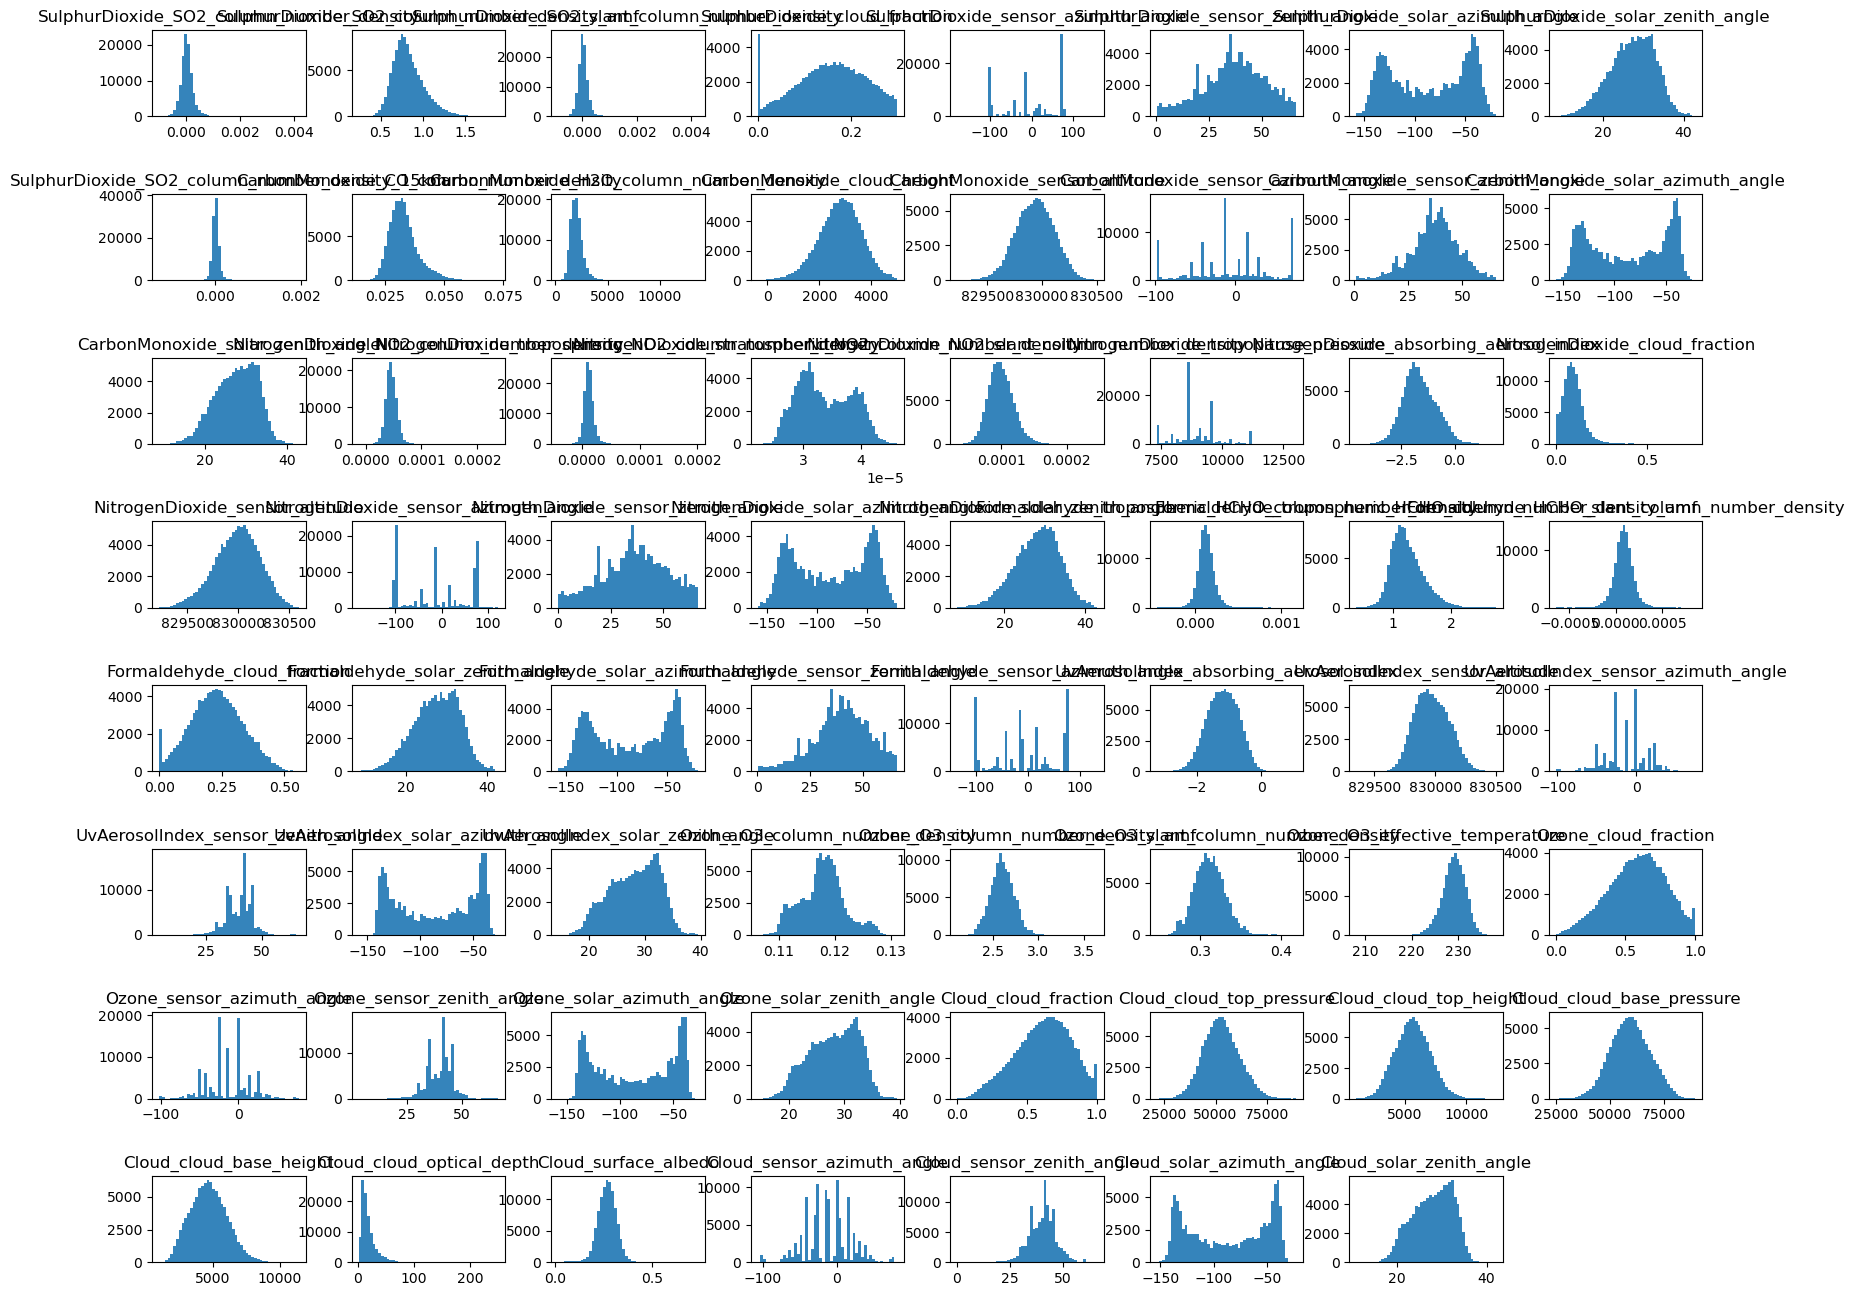

In [31]:
df_copy2[columns_with_nan_values].hist( bins = 50, figsize=(20,16), grid=False,alpha=0.9)
plt.subplots_adjust(hspace=0.9)
plt.show()

We have the same distribution, now we can replace the value

In [32]:
df_data = df_data.fillna(method='ffill').fillna(method='bfill')

In [33]:
df_data.isnull().sum()[df_data.isnull().sum()>0]

Series([], dtype: int64)

<Axes: >

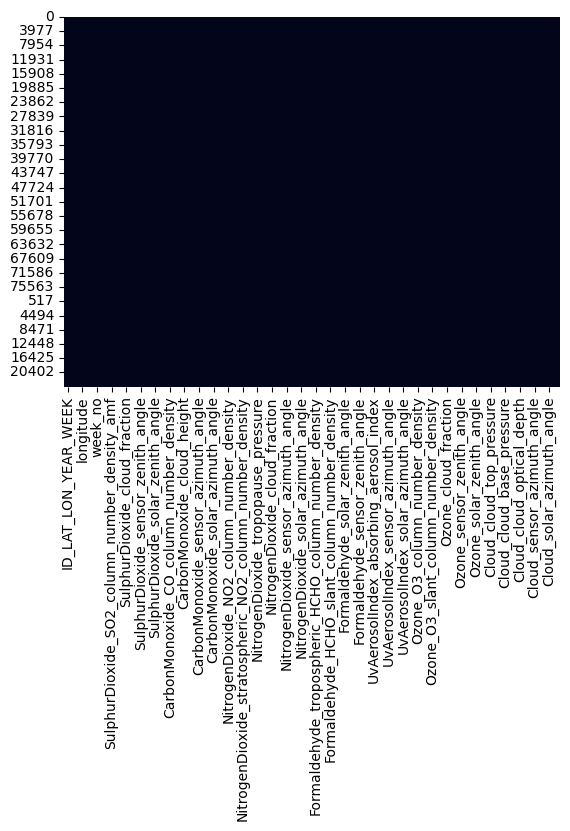

In [34]:
sns.heatmap(df_data.isnull(), cbar = False)

/tmp/ipykernel_20/3029520007.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_data.corr(), cmap = 'Blues', annot = True)


<Axes: >

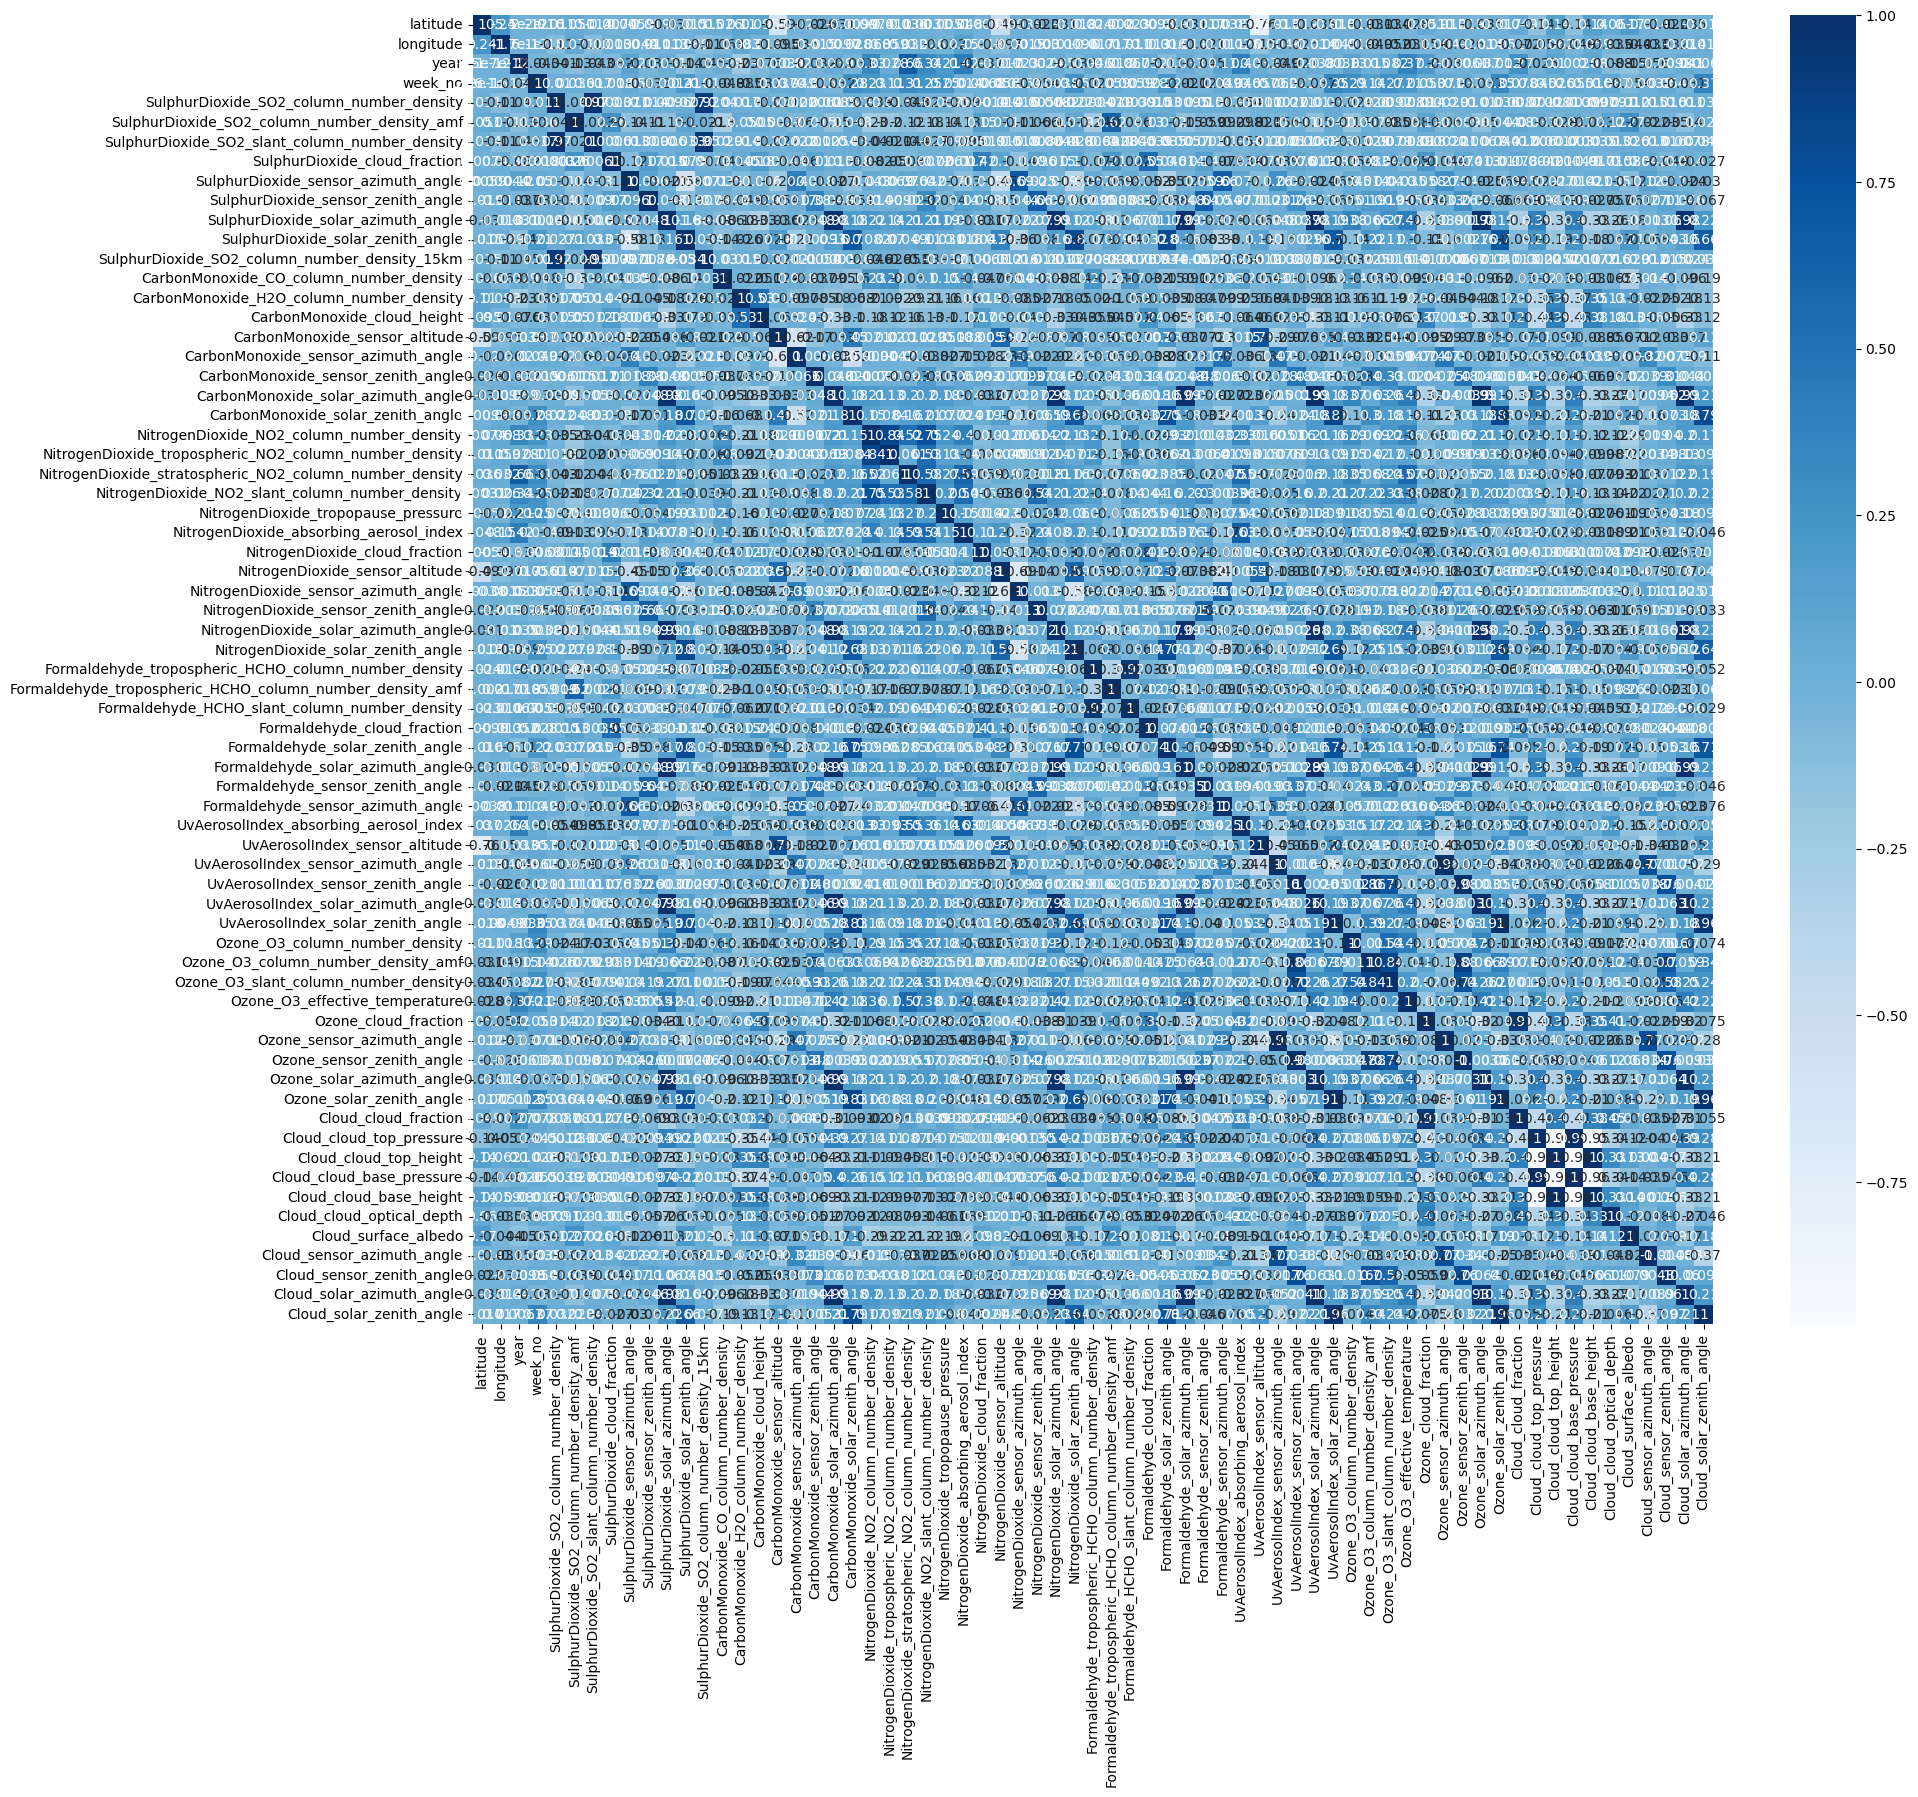

In [35]:
plt.figure(figsize = (20, 17))
sns.heatmap(df_data.corr(), cmap = 'Blues', annot = True)

In [36]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.4/484.4 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 10.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - \ | done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.5/17.5 MB 65.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 63.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 68.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 185.2/185.2 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 70.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.7/118.7 kB 9.

In [37]:
df_data.drop(columns = "ID_LAT_LON_YEAR_WEEK", inplace =True)
df_data.head()

latitude  longitude  year  week_no  \
0     -0.51      29.29  2019        0   
1     -0.51      29.29  2019        1   
2     -0.51      29.29  2019        2   
3     -0.51      29.29  2019        3   
4     -0.51      29.29  2019        4   

   SulphurDioxide_SO2_column_number_density  \
0                                 -0.000108   
1                                  0.000021   
2                                  0.000514   
3                                  0.000514   
4                                 -0.000079   

   SulphurDioxide_SO2_column_number_density_amf  \
0                                      0.603019   
1                                      0.728214   
2                                      0.748199   
3                                      0.748199   
4                                      0.676296   

   SulphurDioxide_SO2_slant_column_number_density  \
0                                       -0.000065   
1                                        0.000014   
2                                        0.000385   
3                                        0.000385   
4                                       -0.000048   

   SulphurDioxide_cloud_fraction  SulphurDioxide_sensor_azimuth_angle  \
0                       0.255668                           -98.593887   
1                       0.130988                            16.592861   
2                       0.110018                            72.795837   
3                       0.110018                            72.795837   
4                       0.121164                             4.121269   

   SulphurDioxide_sensor_zenith_angle  ...  Cloud_cloud_top_pressure  \
0                           50.843559  ...              53534.732422   
1                           39.137194  ...              63790.296241   
2                           52.868816  ...              55923.790554   
3                           52.868816  ...              44569.130636   
4                           35.515587  ...              59904.314844   

   Cloud_cloud_top_height  Cloud_cloud_base_pressure  Cloud_cloud_base_height  \
0             3664.436218               61085.809570              2615.120483   
1             3651.190311               66969.478735              3174.572424   
2             4216.986492               60068.894448              3516.282669   
3             5228.507736               51064.547339              4180.973322   
4             3980.598120               63751.125781              3355.710107   

   Cloud_cloud_optical_depth  Cloud_surface_albedo  \
0                  15.568533              0.272292   
1                   8.690601              0.256830   
2                  21.103410              0.251101   
3                  15.386899              0.262043   
4                   8.114694              0.235847   

   Cloud_sensor_azimuth_angle  Cloud_sensor_zenith_angle  \
0                  -12.628986                  35.632416   
1                   30.359375                  39.557633   
2                   15.377883                  30.401823   
3                  -11.293399                  24.380357   
4                   38.532263                  37.392979   

   Cloud_solar_azimuth_angle  Cloud_solar_zenith_angle  
0                -138.786423                 30.752140  
1                -145.183930                 27.251779  
2                -142.519545                 26.193296  
3                -132.665828                 28.829155  
4                -141.509805                 22.204612  

[5 rows x 67 columns]

In [38]:
from pycaret.regression import *

In [39]:
x_train, x_test = data_preapare().train_test_split(df_data)
x_train.shape, x_test.shape

((79023, 67), (24353, 67))

In [40]:
x_train["emission"] = y
x_train.head(10)

latitude  longitude  year  week_no  \
0     -0.51      29.29  2019        0   
1     -0.51      29.29  2019        1   
2     -0.51      29.29  2019        2   
3     -0.51      29.29  2019        3   
4     -0.51      29.29  2019        4   
5     -0.51      29.29  2019        5   
6     -0.51      29.29  2019        6   
7     -0.51      29.29  2019        7   
8     -0.51      29.29  2019        8   
9     -0.51      29.29  2019        9   

   SulphurDioxide_SO2_column_number_density  \
0                                 -0.000108   
1                                  0.000021   
2                                  0.000514   
3                                  0.000514   
4                                 -0.000079   
5                                  0.000294   
6                                 -0.000285   
7                                 -0.000016   
8                                 -0.000115   
9                                  0.000056   

   SulphurDioxide_SO2_column_number_density_amf  \
0                                      0.603019   
1                                      0.728214   
2                                      0.748199   
3                                      0.748199   
4                                      0.676296   
5                                      0.871713   
6                                      0.791956   
7                                      0.976311   
8                                      0.796941   
9                                      0.998541   

   SulphurDioxide_SO2_slant_column_number_density  \
0                                       -0.000065   
1                                        0.000014   
2                                        0.000385   
3                                        0.000385   
4                                       -0.000048   
5                                        0.000242   
6                                       -0.000226   
7                                       -0.000016   
8                                       -0.000101   
9                                        0.000014   

   SulphurDioxide_cloud_fraction  SulphurDioxide_sensor_azimuth_angle  \
0                       0.255668                           -98.593887   
1                       0.130988                            16.592861   
2                       0.110018                            72.795837   
3                       0.110018                            72.795837   
4                       0.121164                             4.121269   
5                       0.227656                           -13.453690   
6                       0.119397                            72.198647   
7                       0.106799                          -100.956055   
8                       0.164971                           -40.179074   
9                       0.157726                          -100.108744   

   SulphurDioxide_sensor_zenith_angle  ...  Cloud_cloud_top_height  \
0                           50.843559  ...             3664.436218   
1                           39.137194  ...             3651.190311   
2                           52.868816  ...             4216.986492   
3                           52.868816  ...             5228.507736   
4                           35.515587  ...             3980.598120   
5                           57.097124  ...             5530.354546   
6                           58.496368  ...             4378.614648   
7                           23.739841  ...             3468.924146   
8                           31.161560  ...             3160.264670   
9                           33.592015  ...             4141.073340   

   Cloud_cloud_base_pressure  Cloud_cloud_base_height  \
0               61085.809570              2615.120483   
1               66969.478735              3174.572424   
2               60068.894448              3516.282669   
3               51064.547339              4180.973322   
4               63751.12578

In [41]:
s = setup(x_train, 
          target='emission', 
          normalize=True, 
          fold=5)

In [42]:
compare_models()

Processing:   0%|          | 0/85 [00:00<?, ?it/s]

RandomForestRegressor(n_jobs=-1, random_state=3495)

In [43]:
model = create_model("xgboost")

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

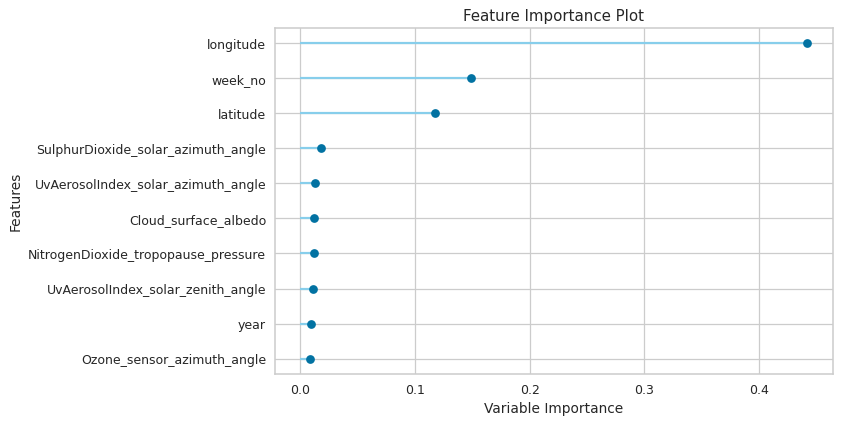

In [44]:
plot_model(model, plot = 'feature', scale=0.9)

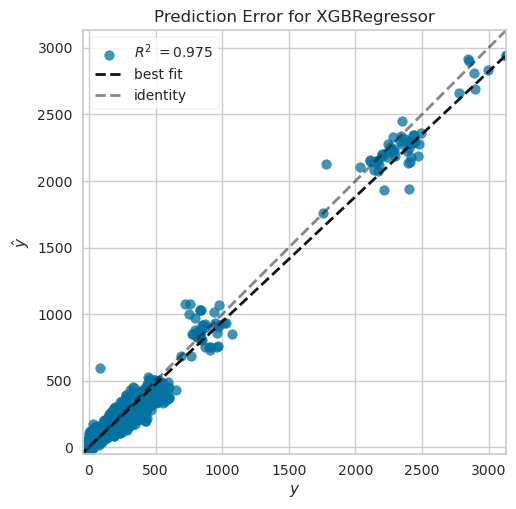

In [45]:
plot_model(model, plot = 'error')

In [46]:
model_tuned = tune_model(model)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [47]:
pred_test = predict_model(model_tuned, data = x_test)

pred_test.head()

latitude  longitude  year  week_no  \
0     -0.51  29.290001  2022        0   
1     -0.51  29.290001  2022        1   
2     -0.51  29.290001  2022        2   
3     -0.51  29.290001  2022        3   
4     -0.51  29.290001  2022        4   

   SulphurDioxide_SO2_column_number_density  \
0                                 -0.000091   
1                                  0.000456   
2                                  0.000161   
3                                  0.000350   
4                                 -0.000317   

   SulphurDioxide_SO2_column_number_density_amf  \
0                                      0.871951   
1                                      0.691164   
2                                      0.605107   
3                                      0.696917   
4                                      0.580527   

   SulphurDioxide_SO2_slant_column_number_density  \
0                                       -0.000079   
1                                        0.000316   
2                                        0.000106   
3                                        0.000243   
4                                       -0.000184   

   SulphurDioxide_cloud_fraction  SulphurDioxide_sensor_azimuth_angle  \
0                       0.000000                            76.825638   
1                       0.000000                            76.239197   
2                       0.079870                           -42.055340   
3                       0.201028                            72.169563   
4                       0.204352                            76.190865   

   SulphurDioxide_sensor_zenith_angle  ...  Cloud_cloud_top_height  \
0                            8.273742  ...             8472.313477   
1                           15.600607  ...             6476.147461   
2                           39.889061  ...             8984.795898   
3                           58.862541  ...             6014.724121   
4                           15.646016  ...             6849.280273   

   Cloud_cloud_base_pressure  Cloud_cloud_base_height  \
0               41047.937500              7472.313477   
1               54915.707031              5476.146973   
2               39006.093750              7984.795898   
3               57646.367188              5014.724121   
4               52896.542969              5849.280273   

   Cloud_cloud_optical_depth  Cloud_surface_albedo  \
0                   7.935617              0.240773   
1                  11.448438              0.293119   
2                  10.753179              0.267130   
3                  11.764557              0.304679   
4                  13.065317              0.284221   

   Cloud_sensor_azimuth_angle  Cloud_sensor_zenith_angle  \
0                 -100.113792                  33.697044   
1                  -30.510319                  42.402592   
2                   39.087360                  45.936481   
3                  -24.465128                  42.140419   
4                  -12.907850                  30.122641   

   Cloud_solar_azimuth_angle  Cloud_solar_zenith_angle  prediction_label  
0                -133.047546                 33.779583          1.575364  
1                -138.632828                 31.012381          1.298760  
2                -144.784988                 26.743361          1.718210  
3                -135.027893                 29.604774         -1.768588  
4                -135.500122                 26.276808        -10.341992  

[5 rows x 68 columns]

In [48]:
predict = pred_test.prediction_label

In [49]:
x_test["emission"] = predict

In [50]:
x_test["date"] = pd.to_datetime(x_test['year'].astype(str) + '-' + x_test['week_no'].astype(str) + '-1', format='%Y-%W-%w')

<Axes: xlabel='Date'>

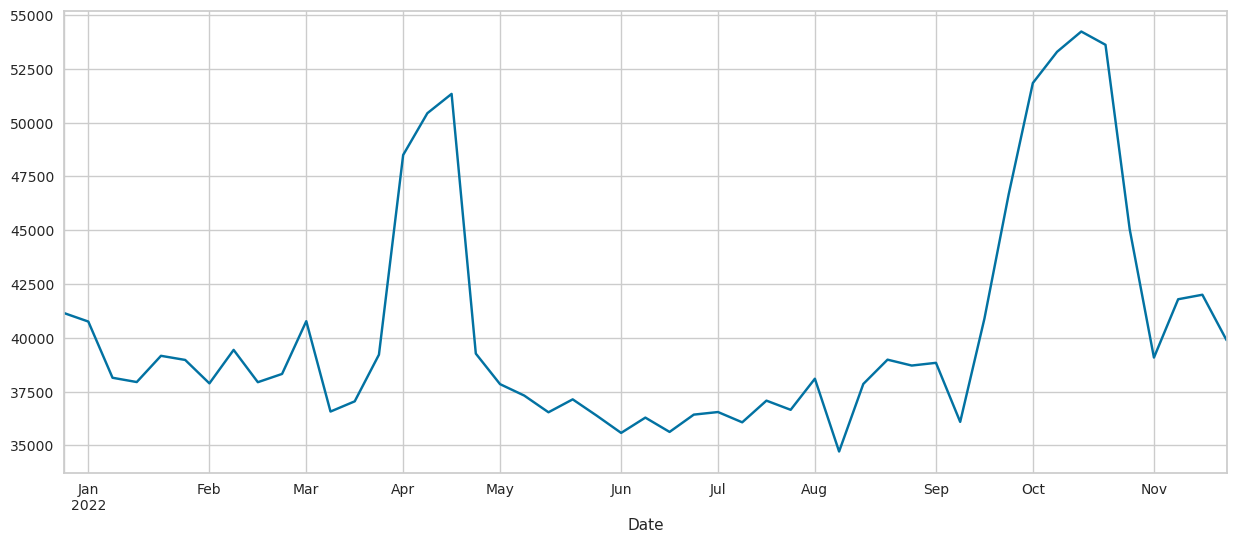

In [51]:
x_test.groupby(by = "date")["emission"].sum().plot(kind='line', figsize=(15, 6), xlabel='Date')

In [52]:
train.head()

ID_LAT_LON_YEAR_WEEK  latitude  longitude  year  week_no  \
0  ID_-0.510_29.290_2019_00     -0.51      29.29  2019        0   
1  ID_-0.510_29.290_2019_01     -0.51      29.29  2019        1   
2  ID_-0.510_29.290_2019_02     -0.51      29.29  2019        2   
3  ID_-0.510_29.290_2019_03     -0.51      29.29  2019        3   
4  ID_-0.510_29.290_2019_04     -0.51      29.29  2019        4   

   SulphurDioxide_SO2_column_number_density  \
0                                 -0.000108   
1                                  0.000021   
2                                  0.000514   
3                                       NaN   
4                                 -0.000079   

   SulphurDioxide_SO2_column_number_density_amf  \
0                                      0.603019   
1                                      0.728214   
2                                      0.748199   
3                                           NaN   
4                                      0.676296   

   SulphurDioxide_SO2_slant_column_number_density  \
0                                       -0.000065   
1                                        0.000014   
2                                        0.000385   
3                                             NaN   
4                                       -0.000048   

   SulphurDioxide_cloud_fraction  SulphurDioxide_sensor_azimuth_angle  ...  \
0                       0.255668                           -98.593887  ...   
1                       0.130988                            16.592861  ...   
2                       0.110018                            72.795837  ...   
3                            NaN                                  NaN  ...   
4                       0.121164                             4.121269  ...   

   Cloud_cloud_base_pressure  Cloud_cloud_base_height  \
0               61085.809570              2615.120483   
1               66969.478735              3174.572424   
2               60068.894448              3516.282669   
3               51064.547339              4180.973322   
4               63751.125781              3355.710107   

   Cloud_cloud_optical_depth  Cloud_surface_albedo  \
0                  15.568533              0.272292   
1                   8.690601              0.256830   
2                  21.103410              0.251101   
3                  15.386899              0.262043   
4                   8.114694              0.235847   

   Cloud_sensor_azimuth_angle  Cloud_sensor_zenith_angle  \
0                  -12.628986                  35.632416   
1                   30.359375                  39.557633   
2                   15.377883                  30.401823   
3                  -11.293399                  24.380357   
4                   38.532263                  37.392979   

   Cloud_solar_azimuth_angle  Cloud_solar_zenith_angle  emission       date  
0                -138.786423                 30.752140  3.750994 2018-12-31  
1                -145.183930                 27.251779  4.025176 2019-01-07  
2                -142.519545                 26.193296  4.231381 2019-01-14  
3                -132.665828                 28.829155  4.305286 2019-01-21  
4                -141.509805                 22.204612  4.347317 2019-01-28  

[5 rows x 77 columns]

In [53]:
x_test.head()

latitude  longitude  year  week_no  \
0     -0.51      29.29  2022        0   
1     -0.51      29.29  2022        1   
2     -0.51      29.29  2022        2   
3     -0.51      29.29  2022        3   
4     -0.51      29.29  2022        4   

   SulphurDioxide_SO2_column_number_density  \
0                                 -0.000091   
1                                  0.000456   
2                                  0.000161   
3                                  0.000350   
4                                 -0.000317   

   SulphurDioxide_SO2_column_number_density_amf  \
0                                      0.871951   
1                                      0.691164   
2                                      0.605107   
3                                      0.696917   
4                                      0.580527   

   SulphurDioxide_SO2_slant_column_number_density  \
0                                       -0.000079   
1                                        0.000316   
2                                        0.000106   
3                                        0.000243   
4                                       -0.000184   

   SulphurDioxide_cloud_fraction  SulphurDioxide_sensor_azimuth_angle  \
0                       0.000000                            76.825638   
1                       0.000000                            76.239196   
2                       0.079870                           -42.055341   
3                       0.201028                            72.169566   
4                       0.204352                            76.190865   

   SulphurDioxide_sensor_zenith_angle  ...  Cloud_cloud_base_pressure  \
0                            8.273742  ...               41047.937500   
1                           15.600607  ...               54915.708579   
2                           39.889060  ...               39006.093750   
3                           58.862543  ...               57646.368368   
4                           15.646016  ...               52896.541873   

   Cloud_cloud_base_height  Cloud_cloud_optical_depth  Cloud_surface_albedo  \
0              7472.313477                   7.935617              0.240773   
1              5476.147161                  11.448437              0.293119   
2              7984.795703                  10.753179              0.267130   
3              5014.724115                  11.764556              0.304679   
4              5849.280394                  13.065317              0.284221   

   Cloud_sensor_azimuth_angle  Cloud_sensor_zenith_angle  \
0                 -100.113792                  33.697044   
1                  -30.510319                  42.402593   
2                   39.087361                  45.936480   
3                  -24.465127                  42.140419   
4                  -12.907850                  30.122641   

   Cloud_solar_azimuth_angle  Cloud_solar_zenith_angle   emission       date  
0                -133.047546                 33.779583   1.575364 2021-12-27  
1                -138.632822                 31.012380   1.298760 2022-01-03  
2                -144.784988                 26.743361   1.718210 2022-01-10  
3                -135.027891                 29.604774  -1.768588 2022-01-17  
4                -135.500119                 26.276807 -10.341992 2022-01-24  

[5 rows x 69 columns]

In [54]:
X = pd.concat((train.drop(columns ="ID_LAT_LON_YEAR_WEEK" ),x_test))

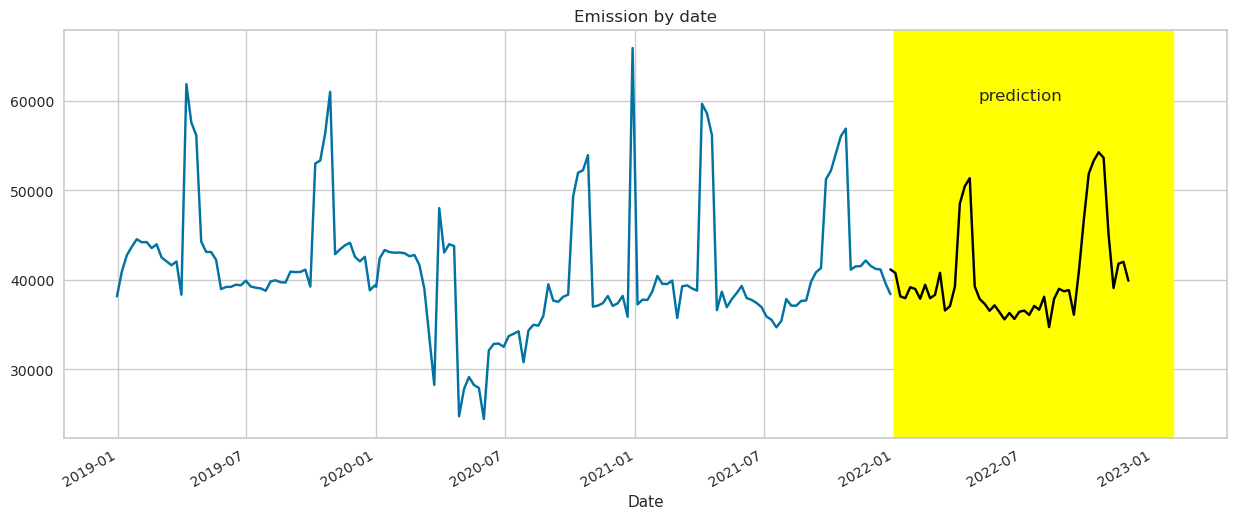

In [55]:
train.groupby(by = "date")["emission"].sum().plot(kind='line', figsize=(15, 6), xlabel='Date')
x_test.groupby(by = "date")["emission"].sum().plot(kind='line', figsize=(15, 6), xlabel='Date', color = 'black')
plt.axvspan(pd.Timestamp("2022-01-01"), pd.Timestamp("2023-01-31"), color = "yellow")
plt.text(pd.Timestamp ('2022-04-30'), 60000, "prediction", size = 12)

plt.title('Emission by date', size=12)
plt.show()

In [56]:
test.ID_LAT_LON_YEAR_WEEK

0        ID_-0.510_29.290_2022_00
1        ID_-0.510_29.290_2022_01
2        ID_-0.510_29.290_2022_02
3        ID_-0.510_29.290_2022_03
4        ID_-0.510_29.290_2022_04
                   ...           
24348    ID_-3.299_30.301_2022_44
24349    ID_-3.299_30.301_2022_45
24350    ID_-3.299_30.301_2022_46
24351    ID_-3.299_30.301_2022_47
24352    ID_-3.299_30.301_2022_48
Name: ID_LAT_LON_YEAR_WEEK, Length: 24353, dtype: object

In [57]:
predict_final = pd.DataFrame({"ID_LAT_LON_YEAR_WEEK": test.ID_LAT_LON_YEAR_WEEK, "emission": predict })
predict_final.to_csv('submission.csv', index = False)

In [58]:
!head submission.csv

ID_LAT_LON_YEAR_WEEK,emission
ID_-0.510_29.290_2022_00,1.5753641
ID_-0.510_29.290_2022_01,1.2987603
ID_-0.510_29.290_2022_02,1.7182096
ID_-0.510_29.290_2022_03,-1.7685881
ID_-0.510_29.290_2022_04,-10.341992
ID_-0.510_29.290_2022_05,1.7586861
ID_-0.510_29.290_2022_06,2.402803
ID_-0.510_29.290_2022_07,5.15833
ID_-0.510_29.290_2022_08,2.2957067
